# QCTO - Workplace Module

### Project Title: Contaminated River Water Parameters
#### Done By: Lebogang Letsoalo

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

<a href=#Eleven>11. Trello and Github link</a>

In [3]:
from IPython.display import display, HTML, Image

# Display the image in the center of the notebook
display(HTML('<center><img src=https://media.istockphoto.com/id/1390096829/photo/environment-engineer-collect-samples-of-wastewater-from-industrial-canals-in-test-tube-close.jpg?s=2048x2048&w=is&k=20&c=Cf_1pRlXeFtnAPwiQGbgWFHdBjYXwgp8qDPa_EI31nk= width="500" height="100"></center>'))


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**
The purpose of this project is to analyze the physico-chemical parameters of a polluted river located in Buenos Aires, with a focus on identifying trends, correlations, and potential health or environmental risks.The goal for this project  is to predict the DO (which is the dissolved oxygen levels) parameter of the river based on the features collected in the dataset
  
* **Introduce:**
Water pollution is a significant environmental issue in many urban areas, including Buenos Aires, where industrial, agricultural, and domestic activities contribute to the contamination of nearby rivers. The physico-chemical parameters of river water, such as temperature, pH, electrical conductivity (EC), total dissolved solids (TDS), and total suspended solids (TSS), provide vital information about the water quality and its suitability for human consumption, aquatic life, and ecological health. By examining these parameters over time and across different locations, this project seeks to uncover patterns of contamination and inform potential mitigation strategies.

* **Objectives:**
Data exploration and cleaning: Data Exploration and Cleaning: Organize and clean the data, addressing any missing values or inconsistencies to ensure accurate analysis.
Trend Analysis: Analyze how key physico-chemical parameters such as pH, electrical conductivity, total dissolved solids, and total suspended solids change over time and across different sampling locations.
Correlation Study: Identify relationships between different environmental variables (e.g., temperature, humidity, and pH) and how they influence the river's contamination levels.
Predictive Modeling: Build models to predict water quality based on various environmental factors and sampling data.
Recommendations for Environmental Management: Provide actionable insights and recommendations for improving water quality, including identifying critical pollution sources and suggesting mitigation measures.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [4]:
#Please use code cells to code in and do not forget to comment your code.
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mlflow
import mlflow
import mlflow.sklearn

import plotly.express as px
import scipy


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---


### Project Details: Contaminated River Water Parameters Analysis

#### Dataset Overview
The dataset used for this analysis was sourced from Kaggle and is the result of a collaborative research effort by three university researchers from Argentina. The research team collected water samples from a widely known polluted river located in Buenos Aires. These samples were taken from various sampling points along the river, including **Puente_Bilbao**, **Puente_Irigoyen**, and **Puente_Falbo**, and analyzed in a chemistry laboratory to measure several physico-chemical parametenent.

The dataset has the following structure:

- **Columns**: 32
  - **Decimal values**: 14 columns (representing numerical values like temperature, pH, EC, TDS, and TSS).
  - **Integer values**: 10 columns (representing variables like time, sample counts, or other measurements).
  - **String values**: 6 columns (including sampling point names and other categorical data).

The data is **chronologically sorted**, ensuring that the time sequence of the samples is preserved. This enables the identification of trends and variations over time, which is crucial for analyzing changes in water quality and the impac of pollution.

#### Sampling Points
The dataset includes water samples collected from three key sampling points located along the river:
- **Puente_Bilbao**
- **Puente_Irigoyen**Arroyo_Las Torres and Arroyo_Salguero are sampling points of 2 different streams flowing into the river.
ewater quality in the river.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [5]:
#reading the data
df = pd.read_csv('River_water parameters.csv')


In [6]:

#Print dataset
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [7]:
#Print river water parameters dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

In [8]:
#check for missing values in each row
df.isnull().sum()


,0
Date (DD/MM/YYYY),0
Time (24 hrs XX:XX),0
Sampling point,0
Ambient temperature (°C),0
Ambient humidity,0
Sample temperature (°C),0
pH,0
EC\n(µS/cm),0
TDS\n(mg/L),0
TSS\n(mL sed/L),6


In [9]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates.head())

Empty DataFrame
Columns: [Date (DD/MM/YYYY), Time (24 hrs XX:XX), Sampling point, Ambient temperature (°C), Ambient humidity, Sample temperature (°C), pH, EC
(µS/cm), TDS
(mg/L), TSS
(mL sed/L), DO
(mg/L), Level (cm), Turbidity (NTU), Hardness
(mg CaCO3/L), Hardness classification, Total Cl-
(mg Cl-/L)]
Index: []


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [10]:
df = df.dropna(subset=['Hardness classification'])

In [11]:
# Calculate the mean of the 'Level (cm)' column, ignoring NaN values
mean_level = df['Level (cm)'].mean()
mean_Hardness = df['Hardness\n(mg CaCO3/L)'].mean()
mean_TSS = df['TSS\n(mL sed/L)'].mean()
mean_Total = df['Total Cl-\n(mg Cl-/L)'].mean()


In [12]:
# Fill NaN values in the columns with the calculated mean
df['Level (cm)'] = df['Level (cm)'].fillna(mean_level)
df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(mean_Hardness)
df['TSS\n(mL sed/L)'] = df['TSS\n(mL sed/L)'].fillna(mean_TSS)
df['Total Cl-\n(mg Cl-/L)'] = df['Total Cl-\n(mg Cl-/L)'].fillna(mean_Total)


<ipython-input-12-a1acda993e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Level (cm)'] = df['Level (cm)'].fillna(mean_level)
<ipython-input-12-a1acda993e19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(mean_Hardness)
<ipython-input-12-a1acda993e19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [13]:

df['Level (cm)'] = df['Level (cm)'].fillna(df['Level (cm)'].mean())
df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(df['Hardness\n(mg CaCO3/L)'].mean())
df['TSS\n(mL sed/L)'] = df['TSS\n(mL sed/L)'].fillna(df['TSS\n(mL sed/L)'].mean())
df['Total Cl-\n(mg Cl-/L)'] = df['Total Cl-\n(mg Cl-/L)'].fillna(df['Total Cl-\n(mg Cl-/L)'].mean())

<ipython-input-13-c2e54a2df598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Level (cm)'] = df['Level (cm)'].fillna(df['Level (cm)'].mean())
<ipython-input-13-c2e54a2df598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(df['Hardness\n(mg CaCO3/L)'].mean())
<ipython-input-13-c2e54a2df598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         217 non-null    object 
 1   Time (24 hrs XX:XX)       217 non-null    object 
 2   Sampling point            217 non-null    object 
 3   Ambient temperature (°C)  217 non-null    float64
 4   Ambient humidity          217 non-null    float64
 5   Sample temperature (°C)   217 non-null    float64
 6   pH                        217 non-null    float64
 7   EC
(µS/cm)                217 non-null    int64  
 8   TDS
(mg/L)                217 non-null    int64  
 9   TSS
(mL sed/L)            217 non-null    float64
 10  DO
(mg/L)                 217 non-null    float64
 11  Level (cm)                217 non-null    float64
 12  Turbidity (NTU)           216 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness classi

In [15]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# reset the index after removing duplicates
df_cleaned = df_cleaned.reset_index(drop=True)

# Print the cleaned DataFrame
print(df_cleaned.head())

  Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0        09/05/2023               14:15      Puente Bilbao   
1        14/06/2023               14:30      Puente Bilbao   
2        14/06/2023               14:30      Puente Bilbao   
3        14/06/2023               15:00  Arroyo_Las Torres   
4        14/06/2023               15:00  Arroyo_Las Torres   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   
3                      11.9              0.47                     13.0  8.3   
4                      11.9              0.47                     13.0  8.5   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1630          810              1.8        4.30   38.370787   
1       

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cleaned[['Sampling point','Hardness classification']])
X.shape

(2, 4)

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.preprocessing import LabelEncoder
#sample data: categorical labels
categorical_cols= ['Sampling point','Hardness classification']
#Initialize the LabelEncoder
label_encoder= LabelEncoder()
# Create a dictionary to store original and encoded labels for each column
label_mapping = {}

In [19]:
# 3. Fit and transform the data for each column
for col in categorical_cols:
    # Fit the encoder to the original labels
    label_encoder.fit(df_cleaned[col])
    # Transform the original labels to encoded labels
    df_cleaned[col + '_encoded'] = label_encoder.transform(df_cleaned[col])

    # Store the mapping in the dictionary
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [20]:
# 4. Display the mapping (Original Labels --> Encoded Labels)
for column, mapping in label_mapping.items():
    print(f"Mapping for column: {column}")
    for original_label, encoded_label in mapping.items():
        print(f"  '{original_label}' --> {encoded_label}")
    print("\n")


Mapping for column: Sampling point
  'Arroyo Salguero' --> 0
  'Arroyo_Las Torres' --> 1
  'Puente Bilbao' --> 2
  'Puente Falbo' --> 3
  'Puente Irigoyen' --> 4


Mapping for column: Hardness classification
  'BLANDA' --> 0
  'SEMIDURA' --> 1




In [21]:
COLUMNS = ["Date", "Time", "Sampling_point", "Ambient_temperature",
           "Ambient_humididty", "Sample_temperature", "ph", "Conductivity",
           "TDS", "TSS", "DO", "Level", "Turbidity", "Hardness", "Hard_class", "CL"]

df_cleaned
df.columns = COLUMNS

# DateTime transform
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.Time = pd.to_datetime(df.Time, format="%H:%M")
df["Datetime"] = df.Date + pd.to_timedelta(df.Time.dt.strftime("%H:%M:%S"))
df.index = df.Datetime
df.drop(["Date", "Time"], axis=1, inplace=True)

df["minute"] = df.Datetime.dt.minute
df["hour"] = df.Datetime.dt.hour
df["day"] = df.Datetime.dt.day
df["month"] = df.Datetime.dt.month
#df["year"] = df.Datetime.dt.year
df["day_of_week"] = df.Datetime.dt.dayofweek
#df["is_weekend"] = df.Datetime.dt.weekday // 5

In [22]:
df = pd.get_dummies(df, columns=["Sampling_point"], prefix="pt")

labelencoder = LabelEncoder()
df.Hard_class = labelencoder.fit_transform(df.Hard_class)

In [23]:
df.head(3)


,Ambient_temperature,Ambient_humididty,Sample_temperature,ph,Conductivity,TDS,TSS,DO,Level,Turbidity,...,minute,hour,day,month,day_of_week,pt_Arroyo Salguero,pt_Arroyo_Las Torres,pt_Puente Bilbao,pt_Puente Falbo,pt_Puente Irigoyen
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-09 14:15:00,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,38.370787,NaN,...,15,14,9,5,1,False,False,True,False,False
2023-06-14 14:30:00,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,38.370787,41.2,...,30,14,14,6,2,False,False,True,False,False
2023-06-14 14:30:00,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,38.370787,38.9,...,30,14,14,6,2,False,False,True,False,False


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


<Axes: >

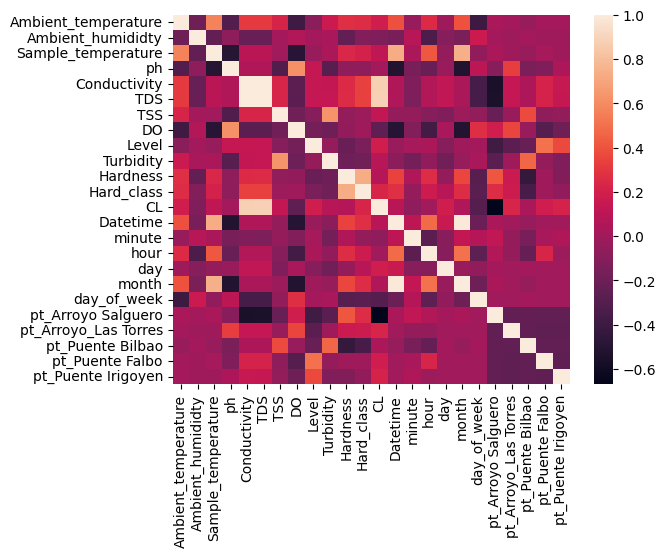

In [24]:
sns.heatmap(df.corr())


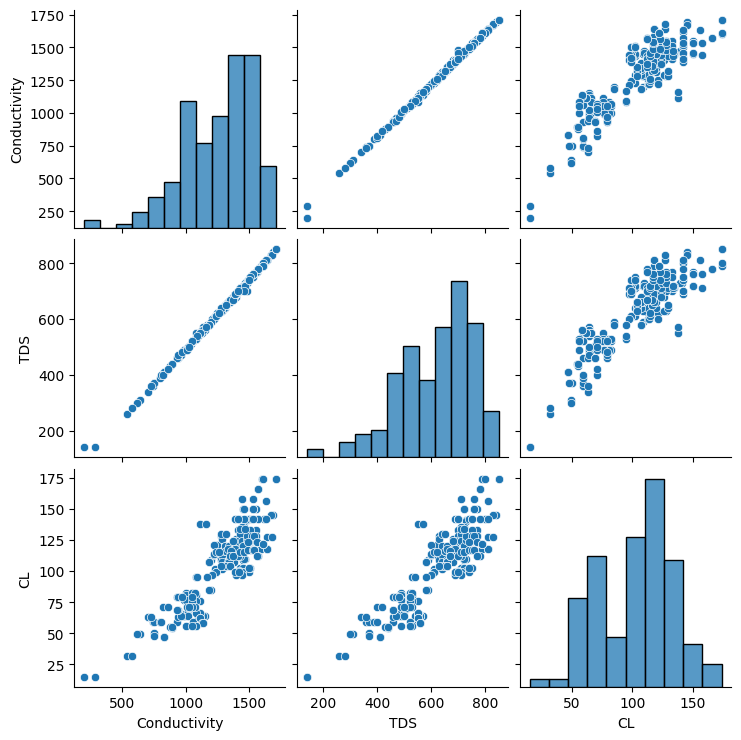

In [25]:
sns.pairplot(df[["Conductivity", "TDS", "CL"]])


<Axes: ylabel='DO'>

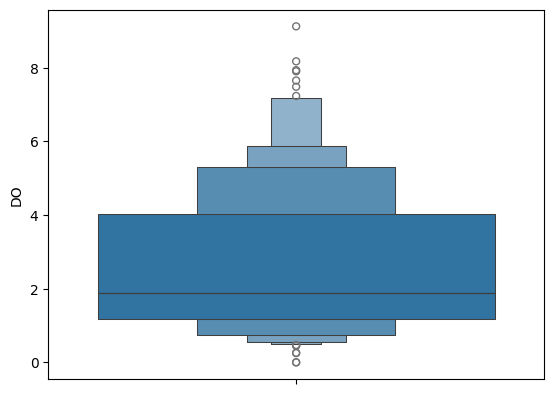

In [26]:
sns.boxenplot(df.DO)


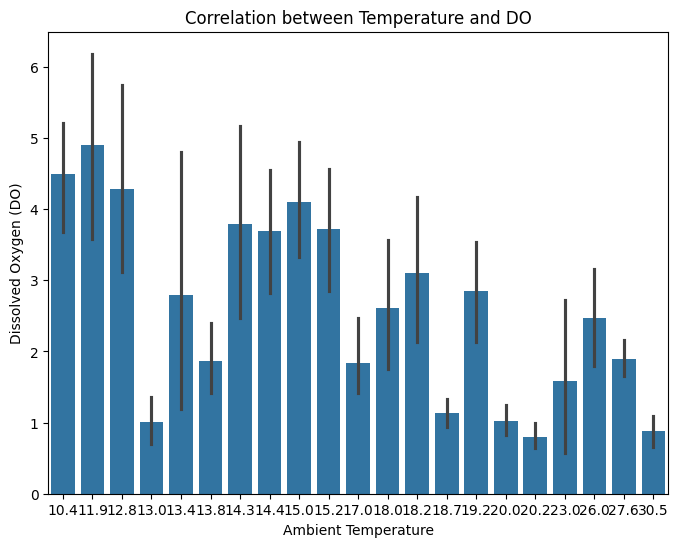

In [27]:
# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Ambient_temperature', y='DO', data=df)
plt.title('Correlation between Temperature and DO')
plt.xlabel('Ambient Temperature')
plt.ylabel('Dissolved Oxygen (DO)')
plt.show()


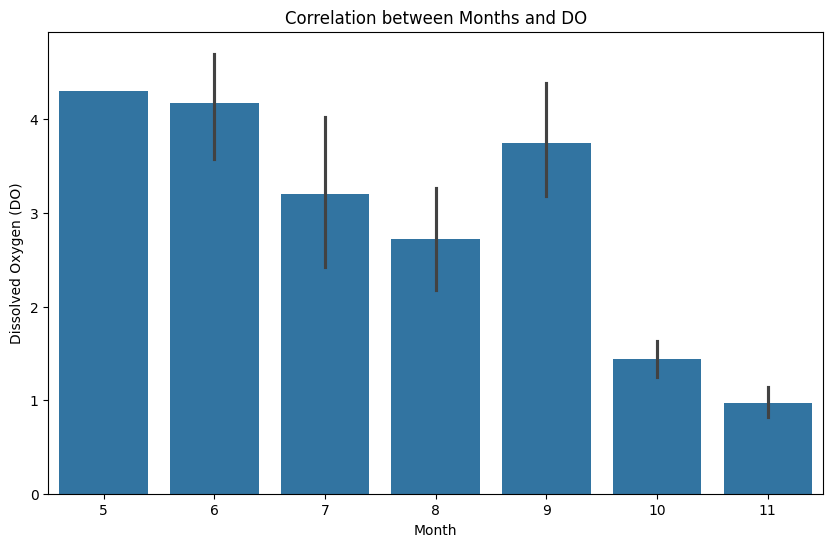

In [28]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='DO', data=df) # Changed 'Ambient_temperature' to 'month'
plt.title('Correlation between Months and DO') # Updated title
plt.xlabel('Month') # Updated x-axis label
plt.ylabel('Dissolved Oxygen (DO)')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [29]:
X, y = df[df.columns.difference(["DO", "Datetime"])], df["DO"]

train_size = 0.8
train_index = int(train_size * len(X))

X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X, y = df[df.columns.difference(["DO", "Datetime"])], df["DO"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the imputed data
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.5711835661791396
Root Mean Squared Error: 1.2534686139585385


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming you have your features (X) and target (y) data:
X, y = df[df.columns.difference(["DO", "Datetime"])], df["DO"]

# ... (Your existing code for train_test_split)

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed



In [35]:
# Fit the imputer on the training data and transform both training and testing data
X_imputed = imputer.fit_transform(X)

# Initialize feature selector
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features

# Fit the selector to the imputed data
X_new = selector.fit_transform(X_imputed, y)

# Get selected feature names
selected_features = X.columns[selector.get_support(indices=True)]

# Create optimized training and testing sets
X_train_optim = pd.DataFrame(X_new, columns=selected_features, index=X.index)[:train_index]
X_test_optim = pd.DataFrame(X_new, columns=selected_features, index=X.index)[train_index:]

# Now you can assign new column names:
NAMES = ["Ambient_temperature", "TDS", "month", "ph", "pt_Arroyo_Las Torres"]
X_train_optim.columns = NAMES
X_test_optim.columns = NAMES

In [36]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

rmse = make_scorer(lambda x,y : np.sqrt(mean_squared_error(x,y)))
mae = make_scorer(mean_absolute_error)

In [37]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

xgbr = XGBRegressor()
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = cross_val_score(estimator=xgbr, X=X_train, y=y_train, scoring=rmse, cv=tscv)
mae_scores = cross_val_score(estimator=xgbr, X=X_train, y=y_train, scoring=mae, cv=tscv)

print(f"train RMSE scores : {rmse_scores}")
print(f"train mean RMSE : {rmse_scores.mean():.3f}")

print(f"train MAE scores : {mae_scores}")
print(f"train mean MAE : {mae_scores.mean():.3f}")

train RMSE scores : [1.54579392 0.9808383  1.08584937 1.37600906 1.01726356]
train mean RMSE : 1.201
train MAE scores : [1.22791982 0.63550875 0.88428253 0.81823693 0.64449   ]
train mean MAE : 0.842


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
# prompt: evaluate the regression model using accuracy  and f1- score

# Assuming 'y_pred' contains the predicted labels and 'y_test' the true labels
# If your model outputs probabilities, you might need to convert them to class labels first.
# For example: y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Assuming you have your features (X) and target (y) data:
X, y = df[df.columns.difference(["DO", "Datetime"])], df["DO"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train your model (example using Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# If you are working with a classification problem, convert continuous predictions to class labels if necessary:
# For example: y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy (for classification problems)
try:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
except ValueError:
    print("Accuracy cannot be calculated for continuous target variables.")

# Calculate F1-score (for classification problems)
try:
    f1 = f1_score(y_test, y_pred, average='binary') # or 'macro', 'weighted' as needed
    print(f"F1-score: {f1}")
except ValueError:
    print("F1-score cannot be calculated for continuous target variables.")

#If your target variable 'y' is continuous, you cannot directly calculate accuracy and F1-score
#Those metrics are applicable to classification tasks, not regression

#For continuous target variable, you can:
#1. Discretize the target variable into categories first and then apply classification metrics
#2. Evaluate your regression model with regression metrics:
#     - Mean Squared Error (MSE)
#     - Root Mean Squared Error (RMSE)
#     - Mean Absolute Error (MAE)
#     - R-squared (R2)

#Example usage (assuming y_pred is a continuous variable)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [ ]:
# prompt: create a bar graph that shows the accuracy of the models

import matplotlib.pyplot as plt
import seaborn as sns

# Sample accuracy data (replace with your actual model accuracy values)
model_names = ['Linear Regression', 'XGBoost']
accuracy_values = [accuracy, rmse_scores.mean()]  # Assuming 'accuracy' and 'rmse_scores.mean()' are defined

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_values)
plt.xlabel('Models')
plt.ylabel('Accuracy/RMSE')  # Adjust y-axis label as needed
plt.title('Model Accuracy Comparison')
plt.show()


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In conclusion we can see that DO can be affected by many of the factors and for future purposes to be able to counteract the effects of all the other factors from dropping DO we can have seperate solutions such as:

for High EC (Electrical Conductivity): Reduce salt and pollutant input by managing agricultural runoff and industrial discharge.

High TDS (Total Dissolved Solids): Use filtration or dilution methods to lower mineral and contaminant concentrations.

High TSS (Total Suspended Solids): Implement sediment control measures and filtration to improve water clarity and oxygen diffusion.

Low DO (0 mg/L): Install aeration systems and reduce organic load to increase oxygen levels quickly.

High Water Level (Level = 39 cm): Enhance water circulation to prevent stratification and support oxygen mixing throughout the column.

High Turbidity: Minimize soil erosion and runoff to allow light penetration and promote oxygen-generating photosynthesis.

High Hardness: Use softening techniques or blend with softer water to maintain DO stability for sensitive aquatic life.

High Hardness Classification: Monitor mineral content and manage water sources to maintain DO-friendly conditions.

High Chloride (Cl⁻): Limit chloride input from road salts and wastewater to protect aquatic organisms and maintain DO balance.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:**
*https://www.kaggle.com/datasets/natanaelferran/river-water-parameters
*https://athena.explore.ai/student/dashboard
*https://youtu.be/O2Cw82YR5Bo
---

## Additional Sections to Consider

* ### Appendix:
Visuals on powerbi

* ### Contributors:
Lebogang Letsoalo ( Project manager )


---
<a href=#ten></a>
## **Trello and Github**
<a href=#cont>Back to Table of Contents</a>

* **Trello:** https://trello.com/invite/b/67d7e7772b2861f27da83c33/ATTId86647883132da6673d4daf07089d5c1ED99E4A1/workplaceproject
* **Github:** https://github.com/LeboL-moriski/Capstone